In [2]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
seaborn.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn
import sklearn.linear_model

In [57]:
def make_data(n):
    "Create an x-grid and n randomly distributed x points"
    gx = np.linspace(-3, 3, 500).reshape(500,1)
    dx = np.random.random(size=(n, 1)) * 6 - 3
    return gx, dx

def make_weights(d):
    "Create a random w of size R^d"
    return np.random.normal(size = (d, 1))

n = 50
gx, dx = make_data(n)

Create the basis functions.

All basis functions take a design matrix nx1 X and return a nxd basis matrix.

In [58]:
def cos_basis(X, d):
    return np.cos(X * np.arange(0, d)) 

def sin_basis(X, d):
    return np.sin(X * np.arange(0, d)) 

def poly_basis(X, d):
    return np.power(X, np.arange(0, d))

def rbf_grid_basis(X, d):
    "RBF over an evenly spaced grid"
    return np.exp(-np.power(X - (np.linspace(-3, 3, d) / 0.5) , 2))

Generate the weights of the true w under a given basis

In [182]:
d = 2

gen_basis = lambda x: poly_basis(x, d)
gPhi = gen_basis(gx)
dPhi = gen_basis(dx)
wts  = make_weights(d)

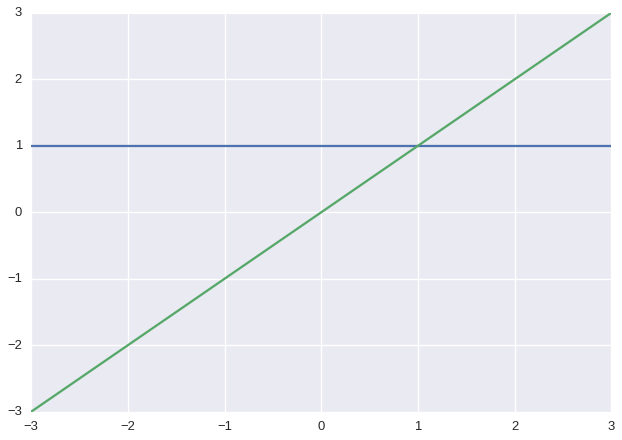

In [183]:
plt.plot(gx, gPhi)
None

<Container object of 2 artists>

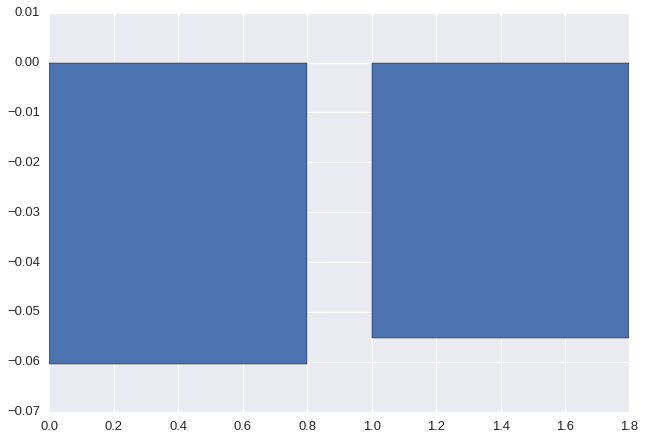

In [184]:
plt.bar(np.arange(d), wts)

Generate the data with noise. Blue is true model and red is after noise.

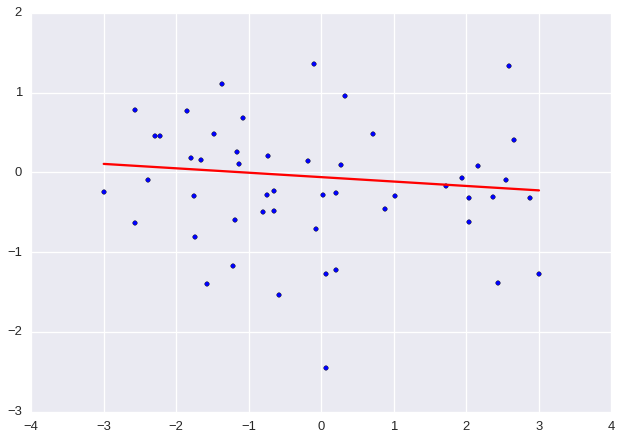

In [185]:
ibeta = 0.5
gy   = np.dot(gPhi, wts)
df   = np.dot(dPhi, wts)
dy = df + np.sqrt(ibeta)*np.random.normal(size = df.shape) # Add noise
plt.plot(gx, gy, color="red")
plt.scatter(dx[:,0],dy[:,0])

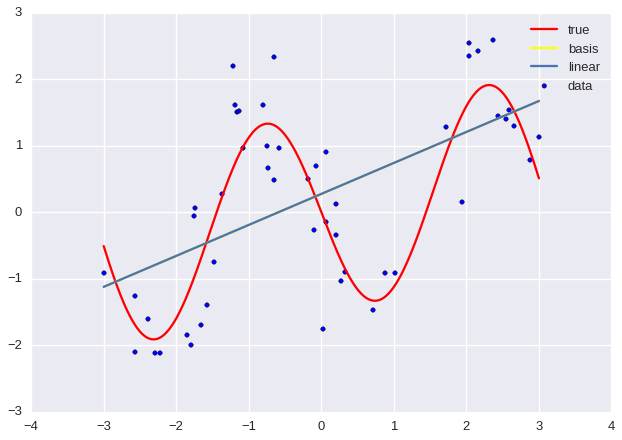

In [181]:
dy1 = sklearn.linear_model.LinearRegression().fit(dx, dy).predict(gx)

basis = lambda dx: poly_basis(dx, 2) 

dy2 = sklearn.linear_model.LinearRegression().fit(basis(dx), dy).predict(basis(gx))
plt.plot(gx, gy, color="red", label="true")
plt.scatter(dx, dy, label="data")

plt.plot(gx, dy2, label="basis", color="yellow")
plt.plot(gx, dy1, label= "linear")
plt.legend()

The basis functions.